<a href="https://colab.research.google.com/github/shihab7219/Data_Augmentation/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing important libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.gridspec as grid
%matplotlib inline


In [ ]:
def brightness(image_file_path):
  image_data = cv2.cvtColor(image_file_path , cv2.COLOR_RGB2HSV) # HSV = Hue, Saturation and Value
  random_bright = 0.8 * np.random.uniform()
  image_data[:,:,2] =  image_data[:,:,2]*random_bright
  image_data = cv2.cvtColor(image_data,cv2.COLOR_RGB2HSV)

  return image_data




In [ ]:
def imageTransformation(image_file_path , angel_range_change , shear_range_change , translation_range):

  # Image Angel Rotation Calculation

  angel_rotation = np.random.uniform(angel_range_change) - angel_range_change / 2
  image_hieght, image_width, color_ch = image_file_path.shape
  image_metrixCalculation = cv2.getRotationMatrix2D((image_width/2, image_hieght/2), angel_rotation, 1)

  #Image Translation
  axisX = translation_range* np.random.uniform() - translation_range/2
  axisY = translation_range* np.random.uniform() - translation_range/2
  TranslatationConcatenateOrMerge = np.float32([[1, 0, axisX], [0, 1, axisY]])
    
    
  #Image Sheare range Calculation
  shear_range_changeValue = np.float32([[5, 5], [20, 5], [5, 20]])
    
  axisPoint1 = 5+ shear_range_change * np.random.uniform() - shear_range_change/2
  axisPoint2 = 20+ shear_range_change * np.random.uniform() - shear_range_change/2
    
  Points = np.float32([[axisPoint1, 5], [axisPoint2, axisPoint1], [5, axisPoint2]])
  shearRangeoncatenateOrMerge  = cv2.getAffineTransform(shear_range_changeValue, Points)
    
    
  image = cv2.warpAffine(image_file_path, image_metrixCalculation, (image_width, image_hieght)) # unpacking
  image = cv2.warpAffine(image, TranslatationConcatenateOrMerge, (image_width, image_hieght))
  image = cv2.warpAffine(image, shearRangeoncatenateOrMerge, (image_width, image_hieght))
    
  image = brightness(image)
    
  return image

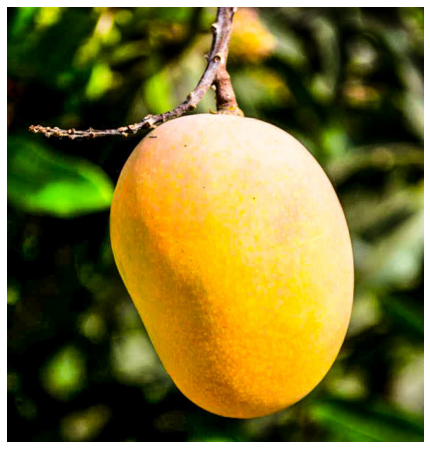

In [ ]:
plt.figure(figsize=(15, 8))
image_file_path = img.imread("/content/sample_data/Hapus_Mango.jpg")
plt.imshow(image_file_path)
plt.axis('off')
plt.show()

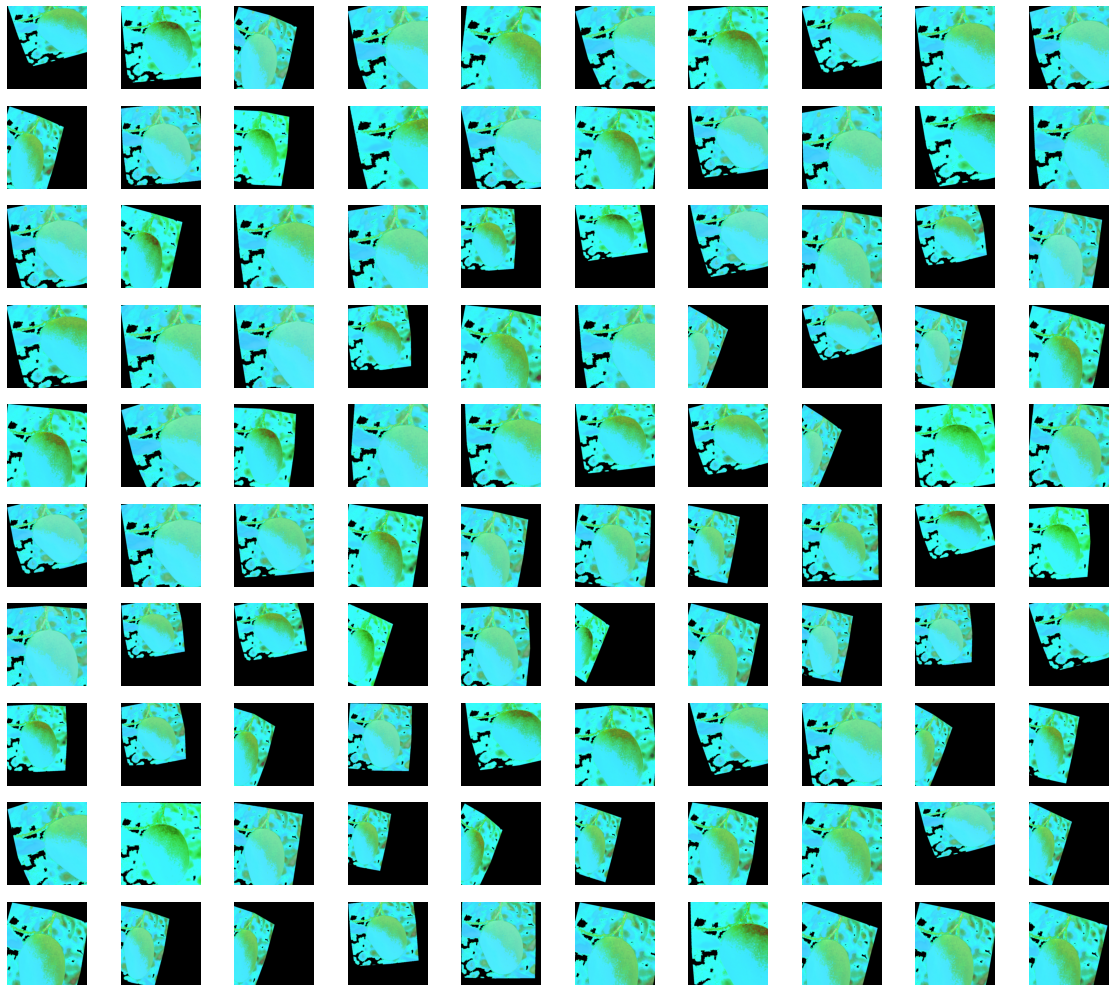

In [ ]:
gridValue1 = grid.GridSpec(10, 10)
gridValue1.update(wspace = 0.01, hspace = 0.02)
plt.figure(figsize=(20,18))

for i in range(100):
    ax1 = plt.subplot(gridValue1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    image = imageTransformation(image_file_path, 20, 10, 5)
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    
    img.imsave("/content/sample_data/imageAugmentations/"+str(i+1)+".png", image)
    
plt.show() 